# Лабораторная работа №5

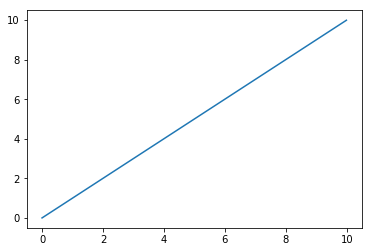

In [9]:
import numpy as np 
from numpy import * #,sqrt,exp
import matplotlib.pyplot as plt

def f(i,t):
    f=-(exp(-(i**2)*(t**2)))/(1+i*t*(cos(t))**2+t**2)
    return t

# print(f(1,0.1))
tlist=np.arange(0,10,0.01)
plt.plot(tlist,f(1,tlist))
plt.show()

## подсчет интеграла

In [10]:
alfa=0
beta=1


def I(i): # i-номер уравнения
    i0=(f(i,alfa)+3*f(i,(2*alfa+beta)/3)+3*f(i,(alfa+2*beta)/3)+f(i,beta))*(beta-alfa)/8
    i1=1
    while (i0-i1)>0.1:
        beta_new=(alfa+beta)/2
        xright=beta_new
        i1=(f(i,xleft)+3*f(i,(2*xleft+xright)/3)+3*f(i,(xleft+2*xright)/3)+f(i,xright))*(xright-xleft)/8
        xleft=beta_new
        xright=beta
        i=(f(i,xleft)+3*f(i,(2*xleft+xright)/3)+3*f(i,(xleft+2*xright)/3)+f(i,xright))*(xright-xleft)/8
    i=i1+i0
    return i

print(I(2))


1.5


## метод прогонки

In [12]:
import numpy as np
from math import sin, cos, sqrt, exp
n=3
def f(i,t):
    f=(exp(-(i**2)*(t**2)))/(1+i*t*(cos(t))**2+t**2)
    return f

A=np.zeros([n,n])
#индексация идет с нуля до n-1
A[0,1]=0 #c1
A[0,0]=1 #d1
A[n-1,n-2]=-0.9 # an
A[n-1,n-1]=1 #dn

def matA(n):
    for i in range(1,n-1):
        for j in range(1,n-1):
            if i==j: 
                k=i+1 #k-номер строки, от 2 до n-1
                A[i,j]=-(3+(((sin(k))**2)*(cos(k))**5)/(k+1))
            elif i==j-1:
                A[i,j]=1+(cos(k))**2
                A[n-2,n-1]=1+(cos(n-1))**2
            elif i==j+1:
                A[i,j]=1
                A[1,0]=1
    return A
def I(i):
    def F(t):
        return f(i,t)
    return spint.quad(F,0,1)[0]
# (f(i,0)+3*f(i,1/3)+3*f(i,2/3)+f(i,1))/8

B=np.zeros(n) 
B[0]=1
B[n-1]=1
import scipy.integrate as spint
def vecB(n):
    for i in range(1,n-1):
        B[i]=-I(i)
    return B 

print(vecB(n))
print(matA(n))

# найдем коэффициенты L,M
l=np.zeros(n-1)
m=np.zeros(n-1)

def LM(n,p): #LM[0]-коэффициент Lk, LM[1]-Mk
    l[0]=0 
    m[0]=0
    for k in range(n-2):
        m[k+1]=(B[k]-m[k]*A[k,k-1])/(A[k,k-1]*l[k]+A[k,k])
    for k in range(n-2):
        l[k+1]=-A[k,k+1]/(A[k,k-1]*l[k]+A[k,k])
#         print(l[k+1],k)
    return [l[p-1],m[p-1]]

# for i in range(2,n):
#     print(i)

print(LM(n,n-1))

def findx(n):
    x=np.zeros(n)
    x[n-1]=(B[n-1]-LM(n,n-1)[1]*A[n-1,n-2])/(LM(n,n-1)[0]*A[n-1,n-2]+A[n-1,n-1])
    print(x[n-1])
    for i in range(n-1):
        i=n-1-i
#         print(i)
        x[i-1]=LM(n,i-1)[0]*x[i]+LM(n,i-1)[1]
#         print(LM(n,i-1)[0],x[i-1])
    return x
print(findx(n))

B_new=matA(n)*findx(n)
print(B_new)
norm=np.linalg.norm(B-B_new)
print(norm)


[ 1.       -0.514581  1.      ]
[[ 1.          0.          0.        ]
 [ 0.         -2.99656028  0.        ]
 [ 0.         -0.9         1.        ]]
[-0.0, 1.0]
1.9
[1.  0.  1.9]
1.9
[[ 1.   0.   0. ]
 [ 0.  -0.   0. ]
 [ 0.  -0.   1.9]]
2.3673573473856067


## метод наискорейшого спуска

In [56]:
E=np.ones([n,n])
r=np.zeros(n)

def findx2(n,x0):
    xi=np.zeros(n)
    while np.linalg.norm(x0-xi)>0.1:
        print(':)')
        for i in range(n):
            ri=A*x0-B
            tayi=np.dot(A*ri,ri)/np.dot(A*ri,A*ri)
            xi=(E-tayi*x0+tayi*E*B)
            x0=xi
#             print(x0)
    x=xi
    return x

x0=[1,2,3,4,5,6]
print(findx2(n,x0))

# print(tay)

:)
[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]


C:\phyton\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\phyton\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\phyton\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in add
  # This is added back by InteractiveShellApp.init_path()
C:\phyton\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
